In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals # inicio nuevo en tf2

In [3]:
import tensorflow as tf
from tensorflow import keras 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-alpha0


In [6]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images,train_labels),(test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [7]:
class_names=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] # para los nombres

In [9]:
print(train_images.shape) # el entrenamiento es de 60000 imagenes de 28x28 cada foto

(60000, 28, 28)


In [10]:
print(len(train_images)) # logitud del train set.

60000


In [11]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [15]:
print(train_labels.shape)# train set de 60000 x 1 etiquetas igual a train_images

(60000,)


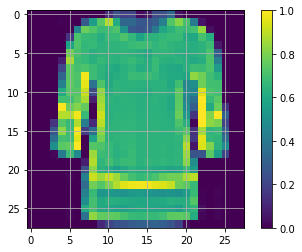

In [24]:
plt.figure()
plt.imshow(train_images[4903])# graficar la imagen de train_images, cambiar el numero
plt.colorbar()# colocar a la grafica barra de color
plt.grid(False) # quitar malla en la grafica
plt.show()# dibujar la grafica

In [23]:
train_images= train_images/255.0 # para escalar la imagenes
test_images= test_images/255.0

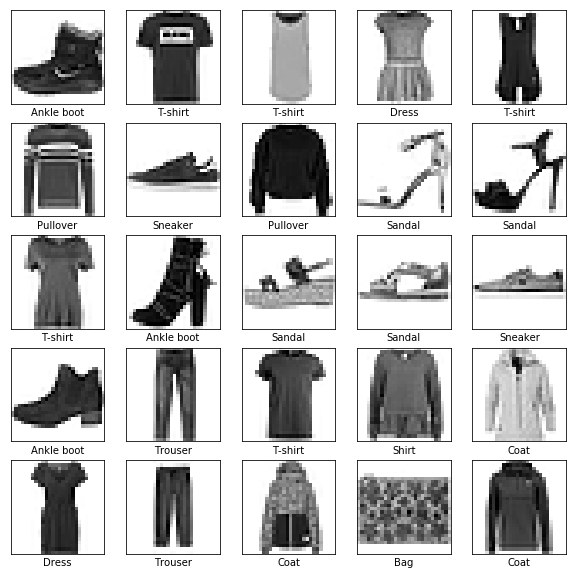

In [28]:
plt.figure(figsize=(10,10)) # dibuja la figura de 10x10 redimensiones
for i in range(25): # numero de imagenes a mostrar 25 
    plt.subplot(5,5,i+1) # malla de 5 x 5, accion a la cual cuadro se le hace cambio ,la imagen
    plt.xticks([]) # nombre del eje x
    plt.yticks([]) # nombre de eje y
    plt.grid(True) # con malla
    plt.imshow(train_images[i], cmap=plt.cm.binary) # que imagen se muestra
    plt.xlabel(class_names[train_labels[i]])# nombre de la imagen en el eje x
plt.show()

In [31]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128,activation='relu'),keras.layers.Dense(10,activation='softmax')])
# la deja como una vector de  y se hace una hidden layers de 128 nodos de entrada. se conecta con una layer de 10 de salida 

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # compilar el modelo y optimizar y como se midel el loss

In [34]:
model.fit(train_images,train_labels,epochs=5) # entreno del modelo

Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5000 - accuracy: 0.8238
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3732 - accuracy: 0.8640
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3362 - accuracy: 0.8770
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3140 - accuracy: 0.8845
Epoch 5/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2924 - accuracy: 0.8920


In [37]:
test_loss,test_accuracy= model.evaluate(test_images,test_labels) # se pueba el modelo
# el modelo tiene overfitting pq la precicion del train es mayo que la de test, no generaliza bien.

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3494 - accuracy: 0.8771


In [38]:
prediction= model.predict(test_images) # predice con todo el conjunto de test

In [39]:
prediction.shape

(10000, 10)

In [45]:
print(prediction[4])

[1.2116581e-01 1.8125837e-05 1.6873077e-01 2.0320972e-03 1.2801112e-02
 1.3574601e-07 6.9411516e-01 2.9006731e-06 1.1322660e-03 1.6155135e-06]


In [46]:
np.argmax(prediction[4]) # predijo el numero se cambia

6

In [47]:
print(class_names[4]) # para cambiar el numero al nombre

Coat


In [44]:
#Se va a dibujar las diferenctes predicciones

In [51]:
def plot_image(i, predictions_array, true_label,img):
    predictions_array, true_label,img= predictions_array[i],true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else: 
        color='red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label],color=color)
              )

In [52]:
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label,= predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10),predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label= np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

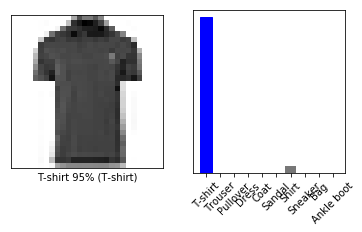

In [85]:
i=4765
plt.figure(figsize=(6,3))
plt.subplot(1,2,1) # 1 fila 2 colunmas para dibijar
plot_image(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)
plt.show
_ = plt.xticks(range(10), class_names, rotation=45)